# Necessary packages are loaded

In [1]:
import numpy as np
from math import exp,sqrt,log
from scipy.linalg import expm, sinm, cosm
from scipy.special import erf,erfinv
import scipy.io
from math import exp,pow
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load simulated raman data generated from Matlab script 

In [2]:
mat = scipy.io.loadmat('smalldata5.mat')

In [4]:
data = mat['X']

In [5]:
data.shape

(100, 100)

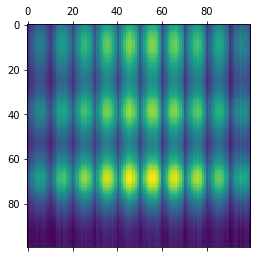

In [6]:
plt.matshow(data.T)

# Load hyper parameters for NMF-GPP

In [7]:
#dimention of data
N , M = data.shape 

In [8]:
#covariance matrix factors, must be checked 
betaD = 0.01 # 
betaH = 0.01 # different from D (more/less sparse?)
ee = 1e-12
L = 3
lambdaa = 1;
sigma = 1;

In [9]:
#Covariance matrices
temp = L*M
M2 = np.asarray(range(1,temp+1))
for i in range(1,temp):
    M2 = np.append(M2,np.asarray(range(1,temp+1)),axis = 0)
M2 = M2.reshape(temp,temp)
M1 = M2.T


In [10]:
CD = np.linalg.cholesky((np.exp((-betaD) * (np.power((M1-M2),2)))+ ee*np.identity(temp)))

In [11]:
temp1 = L*N
N2 = np.asarray(range(1,temp1+1))
for i in range(1,temp1):
    N2 = np.append(N2,np.asarray(range(1,temp1+1)),axis = 0)
N2 = N2.reshape(temp1,temp1)
N1 = N2.T

In [12]:
CH = np.linalg.cholesky((np.exp((-betaD) * (np.power((N1-N2),2)))+ ee*np.identity(temp1)))

# Define link function for prior knowledge
### We expect, based on simulated Raman spectroscopy data, that prior distribution for factors D and H are smooth and exponential.    

In [13]:
#link function
def linkFunExponential(y, sigma, lambdaa):
    ee = 1e-12
    psi = ee+.5-.5*erf((y)/(float(sqrt(2)*sigma)))
    tempp = (-lambdaa**-1)*np.log(psi)
    z = np.max(tempp,0)
    #print(z)
    return z

# Initialize theta and eta
By change of variables, theta and etha are introduced and linked to D and H respectively.  

In [14]:
#Give theta and etha as input to link function

theta = np.zeros((L*M))
theta_input = (np.matmul(theta,CD))


etha = np.zeros((N*L))
etha_input = (np.matmul(CH,etha))

In [15]:
def leastSquare(params,etha_size,theta_size):
#def leastSquare(etha,theta):
    #print(params.shape)
    etha = np.asarray(params[0:etha_size])
    theta = params[theta_size:]
    sigma = 1
    
    #print(etha)
    #print(theta)
    #print(CD)
    #print(CH)
    
    
    
    G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(theta,CD))]) #equal to D
    G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,etha))]) #equal to H
    
    G_theta = G_theta.reshape(L,M)
    G_etha = G_etha.reshape(N,L) 
    
    
    temp = data - np.matmul(G_etha,G_theta)
    temp2 = np.sum(np.square(temp))
    temp3 = 0.5*((pow(sigma, -2))*(temp2) + np.matmul(theta.T,theta) + np.matmul(etha.T,etha))
    print(temp3)
    return temp3
    

# Optimization of variables theta and etha by least squares function

In [16]:
param = np.asarray([etha,theta])

In [17]:
options = {'maxiter' : 20, 'disp' : True}
res = minimize(leastSquare, x0 = np.asarray([etha,theta]) , args=(etha.shape[0],theta.shape[0]), options=options)

10367.342719725422
10367.34271714179
10367.342716247114
10367.342715872515
10367.342715764267
10367.342715828394
10367.342716016472
10367.34271630906
10367.342716961997
10367.342717433356
10367.342717451318
10367.342717698704
10367.342717844467
10367.34271788435
10367.342718055917
10367.342717985955
10367.342718041504
10367.34271795342
10367.34271782815
10367.342717735208
10367.342717501928
10367.342717330479
10367.34271712332
10367.342716860001
10367.34271668622
10367.342716460922
10367.3427162594
10367.34271613311
10367.34271597132
10367.342715874789
10367.342715824578
10367.342715764027
10367.342715773926
10367.342715807494
10367.342715850538
10367.342715950232
10367.342716059791
10367.342716184545
10367.3427163414
10367.342716492874
10367.342716645977
10367.342716796735
10367.342716919018
10367.342717016192
10367.342717078272
10367.34271709058
10367.342717059333
10367.342716978786
10367.342716848749
10367.342716681234
10367.342716478579
10367.342716250603
10367.342716012614
10367.3

10367.342715968847
10367.342715835794
10367.342715669856
10367.342715477876
10367.342715268438
10367.342715051465
10367.3427148377
10367.342714638067
10367.342714463026
10367.342714321898
10367.34271422227
10367.342714169548
10367.342714166612
10367.34271421369
10367.342714308365
10367.342714445771
10367.342714618884
10367.34271481895
10367.34271503592
10367.342715258985
10367.342715477069
10367.342715679357
10367.342715855766
10367.342715997354
10367.342716096664
10367.342716147958
10367.34271614735
10367.34271609289
10367.342715984547
10367.34271582424
10367.342715615827
10367.342715365141
10367.342715079996
10367.342714770144
10367.342714447119
10367.342714123908
10367.342713814447
10367.34271353294
10367.34271329304
10367.342713106997
10367.342712984846
10367.342712933756
10367.342712957587
10367.342713056736
10367.342713228245
10367.342713466202
10367.34271376231
10367.34271410663
10367.342714488332
10367.34271489646
10367.342715320556
10367.342715751152
10367.342716180085
10367.3

3930.368965348743
3930.368965179565
3930.3689650238853
3930.368964887707
3930.3689647769343
3930.3689646968633
3930.368964651713
3930.3689646442836
3930.368964675733
3930.3689647455126
3930.3689648514073
3930.3689649896705
3930.368965155208
3930.3689653417996
3930.368965542326
3930.3689657489995
3930.3689659535967
3930.3689661477
3930.3689663229447
3930.368966471279
3930.368966585255
3930.3689666583386
3930.368966685258
3930.3689666623636
3930.3689665879965
3930.368966462813
3930.368966290033
3930.3689660755463
3930.3689658278477
3930.3689655577605
3930.3689652779476
3930.368965002235
3930.368964744788
3930.3689645192217
3930.368964337708
3930.3689642101776
3930.368964143684
3930.3689641419683
3930.3689642052705
3930.3689643303787
3930.368964510884
3930.368964737613
3930.368964999184
3930.368965282628
3930.3689655740613
3930.36896585935
3930.3689661247445
3930.3689663574673
3930.3689665462016
3930.368966681474
3930.368966755909
3930.3689667643694
3930.36896670402
3930.368966574345
3930

18137.743805501563
18137.74380442099
18137.74380386367
18137.743803812442
18137.743804234728
18137.74380509657
18137.74380635215
18137.74380794999
18137.74380981926
18137.743811881355
18137.74381403887
18137.743816183054
18137.743818198633
18137.74381996331
18137.743821367738
18137.7438223124
18137.743822728193
18137.743822568573
18137.743821831427
18137.7438205422
18137.743818768526
18137.74381660311
18137.74381415751
18137.74381155832
18137.74380892955
18137.74380638565
18137.74380402249
18137.74380191864
18137.74380012378
18137.743798666408
18137.743797555668
18137.743796786675
18137.743796342595
18137.743796203973
18137.74379634701
18137.743796746676
18137.7437973764
18137.743798205513
18137.743799195778
18137.743800302815
18137.743801470442
18137.743802635243
18137.7438037283
18137.74380467884
18137.743805419657
18137.74380589706
18137.743806067323
18137.743805909566
18137.743805425507
18137.74380463496
18137.74380358182
18137.743802322606
18137.743800923996
18137.743799457403
181

905.1099651352235
905.1099656914683
905.1099661058795
905.1099661171386
905.1099663433304
905.1099664863665
905.1099665391445
905.109966716288
905.1099666861961
905.1099667654574
905.1099667276935
905.109966657937
905.1099666143355
905.1099664602255
905.109966352941
905.1099662196267
905.1099660450055
905.1099659385848
905.1099657965863
905.1099656733579
905.1099656057896
905.1099655133536
905.1099654663677
905.1099654506719
905.1099654257825
905.109965447655
905.1099654845189
905.1099655276174
905.109965610765
905.1099657039255
905.1099658122241
905.1099659481599
905.1099660872604
905.1099662333472
905.1099663824049
905.1099665156553
905.1099666320238
905.1099667226849
905.1099667766342
905.1099667953652
905.1099667753448
905.109966717338
905.109966629684
905.109966516861
905.1099663876934
905.1099662537861
905.1099661212368
905.109965998236
905.1099658921238
905.1099658040595
905.1099657367998
905.1099656914755
905.109965665106
905.1099656580673
905.1099656685842
905.109965694729
905

905.1099665201469
905.1099666651675
905.1099667967499
905.1099669119776
905.1099670089
905.1099670863512
905.1099671437074
905.109967180648
905.1099671970003
905.1099671927216
905.1099671680427
905.1099671237417
905.1099670614745
905.1099669840571
905.1099668956
905.1099668014198
905.109966707709
905.1099666209994
905.1099665475092
905.1099664924847
905.1099664596574
905.1099664509064
905.1099664661728
905.1099665036323
905.1099665600786
905.1099666314481
905.1099667133916
905.1099668018107
905.1099668932854
905.1099669853453
905.1099670765717
905.109967166542
905.1099672556495
905.1099673448571
905.109967435431
905.1099675286721
905.1099676256587
905.1099677269668
905.1099678323488
905.109967940365
905.1099680480222
905.1099681505232
905.1099682412579
905.1099683121546
905.109968354435
905.1099683597089
905.1099683212353
905.1099682350979
905.1099681010406
905.1099679227763
905.1099677076957
905.1099674660464
905.1099672097558
905.1099669511341
905.1099667016817
905.1099664711732
905.

44783.61389242687
44783.613892694215
44783.61389364732
44783.61389526368
44783.61389749741
44783.613900273966
44783.6139034866
44783.61390699516
44783.61391062927
44783.613914195514
44783.613917489
44783.613920308155
44783.61392247118
44783.61392383178
44783.6139242924
44783.61392381291
44783.61392241345
44783.61392017122
44783.61391721164
44783.613913695306
44783.61390980246
44783.61390571717
44783.61390161298
44783.61389764165
44783.61389392576
44783.613890555585
44783.61388758975
44783.6138850588
44783.61388297077
44783.61388131747
44783.61388008039
44783.61387923541
44783.61387875602
44783.61387861447
44783.61387878139
44783.61387922426
44783.61387990522
44783.613880779194
44783.61388179278
44783.613882884594
44783.6138839873
44783.61388503115
44783.613885948704
44783.613886680214
44783.6138871787
44783.613887414016
44783.61388737533
44783.61388707152
44783.613886529565
44783.613885791085
44783.61388490767
44783.613883935504
44783.61388293023
44783.613881942336
44783.613881013785
4

480.1816134574141
480.1816134659991
480.1816134621554
480.1816134472516
480.181613424977
480.1816134008047
480.1816133807173
480.1816133701849
480.1816133731487
480.18161339126874
480.1816134235695
480.1816134667501
480.1816135157273
480.18161356450514
480.1816136070205
480.1816136381747
480.18161365439744
480.18161365414903
480.18161363806513
480.18161360885307
480.1816135708872
480.1816135296132
480.18161349061654
480.18161345889763
480.18161343779224
480.181613428447
480.18161342944484
480.18161343694965
480.1816134451716
480.18161344749996
480.1816134375444
480.1816134105827
480.18161336435514
480.18161329975214
480.1816132207613
480.181613133754
480.1816130466576
480.18161296711565
480.18161290196645
480.18161285555914
480.1816128298792
480.18161282418407
480.1816128360618
480.1816128618908
480.1816128977478
480.1816129403675
480.18161298738767
480.1816130376709
480.1816130910518
480.1816131480925
480.1816132096223
480.1816132762064
480.1816133478227
480.1816134235802
480.18161350

4608.738557598983
4608.738557881088
4608.738558192653
4608.738558537277
4608.738558915058
4608.738559322243
4608.738559750239
4608.738560186139
4608.738560613511
4608.738561015297
4608.738561372007
4608.73856166821
4608.738561889622
4608.738562027608
4608.738562079808
4608.738562048015
4608.738561941716
4608.738561774768
4608.738561565138
4608.738561333152
4608.738561099882
4608.738560884237
4608.73856070322
4608.738560568487
4608.738560487531
4608.7385604641395
4608.738560497399
4608.738560585457
4608.738560724812
4608.738560912252
4608.738561145224
4608.738561422085
4608.738561739501
4608.738562094665
4608.738562480025
4608.73856288563
4608.738563296758
4608.738563695097
4608.738564060011
4608.738564369349
4608.738564602251
4608.738564740546
4608.738564770654
4608.738564684827
4608.73856448163
4608.738564167227
4608.73856375322
4608.738563257453
4608.738562701787
4608.738562109667
4608.738561504692
4608.7385609081475
4608.738560337446
4608.738559804832
4608.7385593167355
4608.7385588

426.77270618542076
426.77270635184533
426.77270644050725
426.77270645024976
426.77270641342466
426.7727063906184
426.7727063954515
426.77270637707096
426.7727063904475
426.77270640667587
426.77270642101644
426.772706448244
426.77270646016683
426.7727064728297
426.7727064737618
426.77270646692256
426.77270645663106
426.7727064393458
426.7727064274539
426.7727064197447
426.77270641777636
426.7727064292467
426.7727064479348
426.7727064733302
426.7727065030782
426.7727065301886
426.7727065496762
426.7727065568198
426.77270654812645
426.77270652164475
426.77270647789464
426.77270642000786
426.77270635377516
426.7727062832921
426.77270621546
426.7727061569656
426.77270610817584
426.77270607231645
426.7727060488445
426.77270603211895
426.77270601996497
426.7727060071779
426.7727059878496
426.77270596107445
426.7727059247628
426.77270587951415
426.7727058299587
426.7727057793765
426.77270573298887
426.7727056967351
426.7727056730364
426.7727056638511
426.7727056692877
426.77270568549517
426.77

426.7727056828547
426.7727056377348
426.77270558790303
426.77270553413325
426.77270547720167
426.77270541791796
426.7727053571805
426.7727052960162
426.7727052355746
426.7727051770523
426.7727051215622
426.77270506997934
426.7727050228186
426.7727049801929
426.77270494187957
426.77270490749015
426.7727048766991
426.7727048494661
426.7727048261836
426.77270480769744
426.7727047951876
426.77270478993114
426.7727047930085
426.77270480502233
426.7727048259033
426.77270485484485
426.77270489038375
426.7727049306097
426.77270497345654
426.7727050170196
426.77270505984086
426.77270510111117
426.77270514076287
426.77270517944163
426.77270521837227
426.7727052591464
426.77270530347664
426.77270535295736
426.7727054088772
426.77270547209065
426.7727055429575
426.7727056213183
426.77270570647914
426.77270579718123
426.77270589155836
426.7727059871129
426.7727060807592
426.7727061689798
426.77270624811746
426.77270631477234
426.77270636623626
426.772706400868
426.77270641831444
426.7727064195251
4

378.2696029660486
378.2696029003636
378.26960282565534
378.2696027426151
378.26960265192963
378.26960255445175
378.2696024514169
378.26960234462985
378.2696022365451
378.2696021301921
378.2696020289312
378.26960193608164
378.26960185449263
378.2696017861531
378.2696017319239
378.26960169145167
378.2696016632778
378.26960164511297
378.26960163421523
378.2696016277921
378.269601623353
378.26960161895914
378.26960161334546
378.2696016059227
378.26960159668033
378.2696015860314
378.26960157463236
378.26960156321195
378.2696015524316
378.2696015427928
378.2696015345995
378.2696015279748
378.26960152292565
378.2696015194377
378.2696015175774
378.26960151757385
378.26960151985514
378.2696015250227
378.26960153376183
378.2696015466998
378.26960156424025
378.26960158640634
378.26960161272774
378.2696016421991
378.26960167332084
378.26960170422046
378.26960173283425
378.26960175711616
378.26960177523836
378.2696017857459
378.26960178764324
378.2696017804064
378.26960176393504
378.26960173847283


343.2885177745054
343.2885177964802
343.28851782675247
343.28851786802596
343.2885179218889
343.28851798831846
343.28851806512597
343.28851814779455
343.28851823053776
343.28851830552605
343.28851836609067
343.28851840615135
343.28851842255443
343.2885184147081
343.28851838601355
343.2885183420985
343.2885182908276
343.2885182402482
343.28851819820244
343.2885181700542
343.28851815882217
343.28851816462713
343.2885181848887
343.28851821553525
343.2885182510861
343.28851828637977
343.2885183167062
343.2885183392179
343.28851835251896
343.2885183576411
343.288518357164
343.2885183552817
343.2885183571041
343.28851836745105
343.28851839029284
343.2885184278179
343.28851848001307
343.2885185438768
343.2885186145312
343.2885186854845
343.2885187498256
343.2885188013788
343.2885188363936
343.2885188536288
343.2885188553398
343.28851884659537
343.2885188342652
343.28851882574185
343.2885188275981
343.2885188439539
343.28851887625973
343.28851892272564
343.2885189789715
343.2885190389786
343.2

304.63182659954856
304.6318264878513
304.63182632465794
304.6318262334315
304.63182620558626
304.6318261694295
304.63182615619394
304.63182616241147
304.63182615854527
304.63182618484126
304.63182618907706
304.6318262084279
304.63182622627784
304.6318262334602
304.6318262585078
304.6318262754837
304.63182630117524
304.6318263411486
304.63182637662374
304.6318264274153
304.63182648051566
304.6318265253335
304.63182657514017
304.63182660855745
304.63182662475947
304.6318266302796
304.63182660931284
304.6318265700515
304.63182651726254
304.6318264473749
304.63182637186827
304.63182629552665
304.63182622098026
304.6318261551706
304.6318260995037
304.6318260540884
304.63182601857676
304.63182599010634
304.6318259655213
304.63182594180256
304.63182591634825
304.63182588765403
304.63182585557456
304.6318258214029
304.63182578703106
304.63182575503845
304.63182572805124
304.63182570746596
304.6318256939258
304.6318256868953
304.6318256841809
304.6318256831414
304.6318256807769
304.631825673934

304.6318254439533
304.63182540816655
304.63182536848194
304.63182532508665
304.63182527816775
304.63182522785456
304.6318251741212
304.6318251166892
304.63182505499174
304.6318249882498
304.6318249156866
304.63182483686313
304.6318247520707
304.63182466269296
304.6318245714341
304.63182448233727
304.63182440055556
304.6318243318902
304.6318242821614
304.6318242565089
304.63182425873333
304.6318242907787
304.63182435243044
304.6318244412661
304.6318245528597
304.63182468120425
304.6318248192918
304.63182495977566
304.6318250956327
304.63182522074845
304.63182533036627
304.6318254213577
304.6318254923038
304.63182554339494
304.6318255761856
304.6318255932507
304.6318255978003
304.63182559330477
304.6318255831763
304.6318255705308
304.63182555804303
304.6318255478826
304.63182554170487
304.6318255406611
304.63182554539895
304.6318255560328
304.6318255720916
304.63182559247457
304.63182561546046
304.6318256388221
304.63182566007146
304.6318256768274
304.63182568725085
304.63182569045597
30

318.7951399140878
318.79514007453696
318.79514021410847
318.7951403234472
318.7951403937268
318.79514041790935
318.79514039189985
318.7951403153315
318.79514019179265
318.79514002843257
318.7951398350246
318.79513962268186
318.795139402486
318.79513918427926
318.7951389758172
318.7951387823708
318.79513860676934
318.7951384497864
318.7951383107239
318.7951381880458
318.7951380799363
318.7951379847123
318.79513790106563
318.79513782814894
318.7951377655503
318.79513771319637
318.79513767122836
318.79513763987615
318.7951376193488
318.7951376097475
318.7951376110007
318.7951376228201
318.7951376446679
318.7951376757316
318.7951377149001
318.79513776074003
318.795137811478
318.79513786500087
318.7951379188874
318.79513797048475
318.79513801703774
318.7951380558661
318.79513808457335
318.79513810126065
318.7951381047146
318.7951380945349
318.79513807117695
318.7951380358958
318.79513799059015
318.79513793756803
318.795137879266
318.79513781797175
318.79513775559695
318.79513769354196
318.7

286.6575208521999
286.6575209314328
286.65752101411397
286.65752109641505
286.65752117408397
286.6575212415428
286.6575212944902
286.6575213291224
286.6575213439949
286.65752133952185
286.6575213191677
286.6575212878466
286.65752125199566
286.6575212178775
286.6575211913873
286.6575211762531
286.6575211743327
286.6575211853002
286.6575212069203
286.6575212361202
286.6575212690042
286.6575213021899
286.65752133272827
286.65752135909304
286.65752138065824
286.65752139841527
286.65752141421973
286.65752143092277
286.65752145191254
286.6575214802898
286.6575215185474
286.6575215679025
286.65752162797503
286.6575216961843
286.6575217685403
286.65752183981317
286.6575219044488
286.65752195751054
286.6575219959532
286.6575220188452
286.65752202806266
286.65752202777657
286.6575220236425
286.6575220217141
286.6575220273123
286.6575220438111
286.65752207238006
286.6575221116973
286.65752215850597
286.657522208412
286.6575222568065
286.6575222996377
286.6575223341939
286.65752235923
286.65752237

269.7665186642554
269.76651868206636
269.76651866988936
269.76651870394716
269.76651869467264
269.76651870642974
269.76651871422547
269.7665187023884
269.76651871327823
269.76651871004606
269.76651871388435
269.7665187328762
269.7665187455435
269.76651877483005
269.7665188091308
269.76651883910483
269.76651887897333
269.7665189095037
269.7665189304428
269.76651894794617
269.76651894638485
269.7665189327625
269.76651891002854
269.76651887218605
269.766518829346
269.7665187838536
269.7665187359852
269.7665186930078
269.7665186550278
269.7665186222148
269.76651859630647
269.76651857474235
269.76651855609316
269.76651853961357
269.766518523032
269.766518506233
269.766518489744
269.7665184741178
269.76651846132586
269.76651845313813
269.76651845074605
269.76651845510895
269.7665184658731
269.7665184815129
269.76651849989906
269.7665185179537
269.7665185323765
269.7665185403376
269.7665185391668
269.7665185272086
269.76651850379733
269.7665184690144
269.7665184241124
269.76651837114224
269.7

269.76651735069936
269.7665173000028
269.7665172462439
269.7665171903491
269.76651713442396
269.766517081644
269.7665170359642
269.7665170016918
269.76651698298366
269.766516983341
269.7665170051658
269.76651704943146
269.76651711550574
269.76651720114165
269.76651730263626
269.766517415138
269.7665175330657
269.7665176505924
269.7665177621396
269.76651786282747
269.76651794883577
269.7665180176387
269.7665180681013
269.76651810044
269.76651811606985
269.7665181173722
269.76651810742425
269.7665180897214
269.76651806791756
269.7665180455941
269.7665180260496
269.76651801210073
269.76651800588996
269.76651800869956
269.76651802079635
269.7665180413426
269.76651806841505
269.7665180991691
269.76651813015746
269.76651815777745
269.7665181787874
269.7665181907941
269.7665181926186
269.76651818445396
269.7665181677811
269.76651814505635
269.7665181192423
269.76651809328337
269.76651806963923
269.7665180499632
269.76651803497515
269.76651802452534
269.7665180178085
269.76651801365693
269.766

259.30985702386005
259.309856991419
259.3098569497471
259.3098569005139
259.30985684586557
259.3098567881523
259.30985672969047
259.3098566725818
259.30985661860046
259.3098565691406
259.3098565252174
259.3098564875036
259.30985645638503
259.3098564320169
259.30985641436524
259.30985640322285
259.3098563981975
259.3098563986819
259.3098564038179
259.3098564124762
259.30985642326885
259.3098564346036
259.3098564447825
259.3098564521316
259.30985645514244
259.30985645260154
259.3098564436804
259.3098564279708
259.30985640545214
259.3098563764
259.30985634125466
259.3098563004854
259.3098562544907
259.3098562035675
259.3098561479653
259.30985608801427
259.30985602428683
259.3098559577375
259.30985588976466
259.3098558221538
259.30985575690045
259.30985569594196
259.30985564086063
259.3098555926308
259.309855551474
259.3098555168612
259.30985548766347
259.3098554624223
259.309855439683
259.30985541832854
259.309855397854
259.3098553785393
259.30985536149575
259.309855348585
259.30985534222

249.28651296058243
249.28651301268505
249.28651306512927
249.28651311941218
249.28651317746187
249.28651324092152
249.28651331045796
249.28651338518716
249.286513462607
249.28651353879542
249.28651360907236
249.2865136687627
249.28651371396464
249.28651374220837
249.28651375256396
249.28651374578845
249.28651372402618
249.2865136903138
249.28651364831856
249.28651360180513
249.28651355441286
249.28651350946552
249.28651346981488
249.28651343778768
249.28651341513816
249.2865134030216
249.2865134019959
249.28651341204846
249.28651343270408
249.28651346312623
249.28651350233062
249.286513549286
249.28651360305076
249.28651366272794
249.28651372725417
249.28651379523302
249.28651386473618
249.28651393311475
249.28651399714727
249.2865140533532
249.28651409842635
249.28651412967506
249.28651414541915
249.28651414541633
249.28651413053615
249.286514102787
249.28651406493083
249.28651402021382
249.2865139720774
249.28651392396497
249.28651387919516
249.2865138408903
249.28651381164875
249.28

239.6319544516794
239.63195438801853
239.631954320898
239.63195425321294
239.63195418794632
239.6319541277037
239.63195407449717
239.63195402944575
239.63195399295574
239.63195396471033
239.63195394395012
239.63195392988337
239.63195392172665
239.63195391888962
239.63195392080885
239.63195392678838
239.6319539357681
239.63195394623975
239.63195395637175
239.63195396415966
239.63195396791764
239.63195396653433
239.63195395967202
239.63195394772853
239.63195393160922
239.63195391227688
239.6319538904669
239.63195386631082
239.63195383949528
239.63195380938268
239.63195377530002
239.6319537370758
239.63195369515935
239.63195365066142
239.631953605176
239.63195356037204
239.63195351768564
239.63195347786342
239.63195344077806
239.63195340559741
239.6319533711738
239.63195333621155
239.63195329961079
239.63195326111583
239.63195322122408
239.6319531803844
239.63195313962234
239.63195309990425
239.63195306152244
239.63195302508183
239.63195299080837
239.6319529591886
239.63195293039576
239.6

239.6319542994
239.63195426641843
239.63195423483856
239.6319542052741
239.63195417832074
239.6319541546083
239.6319541348384
239.6319541197932
239.63195411030586
239.63195410718947
239.63195411112892
239.63195412255277
239.6319541415061
239.6319541675517
239.63195419972243
239.6319542365388
239.6319542760936
239.6319543161915
239.6319543545206
239.6319543888264
239.63195441705867
239.63195443746565
239.63195444862237
239.6319544493948
239.63195443886067
239.631954416221
239.6319543807471
239.63195433179942
239.63195426893867
239.63195419211968
239.63195410192986
239.6319539998095
239.6319538881895
239.63195377049146
239.63195365096578
239.6319535343777
239.6319534255836
239.63195332905954
239.63195324844995
239.63195318619816
239.63195314330437
239.63195311924005
239.63195311202992
239.63195311849887
239.6319531346656
239.63195315624708
239.63195317922006
239.6319532003689
239.63195321773873
239.63195323091645
239.63195324108332
239.63195325081654
239.63195326366113
239.6319532835342


228.55136716118113
228.55136717926314
228.55136720351481
228.55136723529105
228.5513672747182
228.55136732069838
228.55136737108637
228.55136742300488
228.55136747324119
228.5513675186703
228.55136755664523
228.5513675853118
228.5513676038156
228.55136761238563
228.5513676122921
228.55136760568865
228.5513675953543
228.5513675843599
228.55136757569937
228.5513675719222
228.55136757482322
228.55136758523437
228.5513676029586
228.55136762686325
228.5513676551226
228.55136768556653
228.55136771606902
228.55136774489753
228.55136777095163
228.5513677938455
228.55136781382754
228.55136783156894
228.55136784788584
228.55136786347165
228.55136787870512
228.5513678935745
228.55136790772022
228.55136792056535
228.55136793148517
228.5513679399618
228.551367945685
228.55136794858424
228.5513679487998
228.5513679466153
228.55136794238308
228.55136793646454
228.55136792919927
228.55136792090437
228.55136791189457
228.5513679025123
228.5513678931536
228.55136788427941
228.551367876405
228.5513678700

211.5662065592119
211.56620653919376
211.56620649712286
211.56620643530002
211.5662063573695
211.5662062679555
211.56620617205837
211.56620607463827
211.56620598027865
211.56620589290512
211.56620581562598
211.5662057506203
211.56620569905812
211.5662056610911
211.56620563590388
211.56620562188326
211.566205616852
211.56620561836084
211.5662056240197
211.5662056317157
211.56620563982068
211.56620564723792
211.5662056533685
211.56620565802731
211.5662056612983
211.56620566342366
211.5662056646967
211.5662056653931
211.56620566573605
211.56620566588458
211.5662056659389
211.5662056659545
211.56620607631154
211.5662061883889
211.5662063017622
211.56620641033723
211.56620650762142
211.56620658741608
211.5662066446082
211.56620667589905
211.56620668027483
211.56620665911217
211.56620661587812
211.56620655551527
211.5662064836676
211.56620640593385
211.56620632730773
211.56620625188015
211.56620618279663
211.56620612238322
211.56620607232315
211.56620603377868
211.5662060074001
211.566205993

197.03288350760826
197.032883517815
197.03288351948518
197.0328835125175
197.0328834981641
197.03288347937274
197.03288345949605
197.03288344138153
197.0328834275597
197.0328834188216
197.03288341504216
197.03288341493777
197.03288341645103
197.03288341700275
197.0328834143356
197.03288340581395
197.0328833898588
197.03288336530971
197.03288333225666
197.03288329211514
197.03288324770284
197.0328832032969
197.0328831639876
197.03288313503833
197.03288312091257
197.03288312438903
197.03288314599018
197.03288318357653
197.03288323303235
197.0328832886833
197.03288334446864
197.03288339514123
197.03288343696468
197.0328834683008
197.03288348960692
197.03288350302083
197.03288351214974
197.0328835204086
197.03288353157754
197.03288354822828
197.032883572198
197.03288360381342
197.03288364274366
197.03288368730065
197.0328837352133
197.03288378351328
197.032883829222
197.03288386932948
197.03288390157937
197.03288392482753
197.03288393930634
197.03288394686754
197.03288395045396
197.0328839

197.03288430014638
197.03288427801277
197.03288426391825
197.03288425916614
197.0328842629635
197.03288427274038
198.73491316680082
198.73491316680082
198.73491300838393
198.73491379756345
198.73491425346788
198.73491453827302
198.73491473028818
198.73491482938323
198.7349148041015
198.73491451234122
198.73491426823864
198.73491421455444
198.73491405175378
198.7349139157551
198.73491383256342
198.7349136993101
198.73491365466242
198.73491358659263
198.73491356430733
198.73491356429042
198.73491356769048
198.73491360828206
198.73491364335771
198.73491369027823
198.73491375130467
198.73491379591607
198.73491385250216
198.73491390502568
198.73491394285506
198.734913989813
198.7349140238875
198.734914048972
198.73491407671605
198.73491408725988
198.73491408960473
198.73491408492973
198.73491406012135
198.73491402464393
198.73491397626492
198.73491391075973
198.73491383714557
198.73491375540445
198.7349136682472
198.73491358309573
198.73491350227354
198.734913429751
198.7349133695608
198.73

198.73491331871247
198.73491332798537
198.73491334500065
198.73491337171345
198.7349134092274
198.73491345742173
198.7349135147128
198.7349135780118
198.73491364291422
198.73491370411634
198.73491375601455
198.7349137934032
198.7349138121627
198.7349138098289
198.7349137859452
198.73491374213862
198.73491368190096
198.7349136101068
198.73491353234203
198.73491345414928
198.7349133803081
198.73491331426754
198.73491325781725
198.73491321104413
198.73491317256742
198.7349131399985
198.73491311053203
198.73491308156235
198.73491305122266
198.73491301877334
198.7349129847912
198.73491295115522
198.73491292083872
198.73491289754423
198.73491288522214
198.73491288752453
198.73491290725312
198.7349129458681
198.73491300312796
198.73491307692507
198.73491316335972
198.73491325706553
198.73491335175265
198.7349134408979
198.73491351847898
198.7349135796409
198.73491362119447
198.73491364187882
198.73491364236057
198.73491362499027
198.73491359336825
198.73491355180113
198.73491350473213
198.734

189.48307027822642
189.4830702533838
189.48307020113938
189.48307012549648
189.48307003236727
189.48306992881962
189.4830698222512
189.48306971964183
189.48306962698314
189.4830695489231
189.48306948860696
189.48306944766128
189.48306942626522
189.48306942327005
189.48306943635833
189.48306946225296
189.48306949699577
189.48306953629853
189.48306957594602
189.48306961220388
189.4830696421661
189.48306966397962
189.48306967690596
189.48306968121247
189.48306967792647
189.4830696685144
189.48306965456203
189.4830696375235
189.48306961858646
189.48306959866406
189.48306957849675
189.48306955882035
189.4830695405466
189.48306952490273
189.48306951348738
189.4830695082157
189.4830695111499
189.48306952422632
189.48306954891802
189.48306958588114
189.48306963465149
189.48306969345552
189.4830697591903
189.48306982760462
189.48306989367705
189.4830699521515
189.48306999815736
189.48307002781564
189.48307003873663
189.48307003032073
189.48307000381072
189.48306996208203
189.48306990919917
189.

187.08840380725508
187.0884038630541
187.0884039323851
187.08840401243037
187.0884040991712
187.0884041876817
187.08840427281547
187.08840434973735
187.08840441466677
187.08840446547538
187.08840450199668
187.0884045260526
187.0884045410327
187.08840455109268
187.0884045601679
187.08840457094112
187.08840458418751
187.08840459847553
187.08840461055306
187.08840461611885
187.0884046109265
187.0884045919672
187.08840455831074
187.08840451154714
187.08840445568865
187.08840439657757
187.0884043408843
187.08840429512168
187.08840426468484
187.08840425316458
187.08840426218305
187.0884042912837
187.08840433838333
187.08840440003735
187.0884044718847
187.08840454898777
187.08840462616655
187.08840469843213
187.088404761326
187.088404811459
187.08840484691362
187.0884048674501
187.08840487445167
187.08840487065936
187.08840485927453
187.08840484343892
187.08840482545787
187.08840480624582
187.08840478546054
187.08840476163437
187.08840473286529
187.088404697589
187.08840465522323
187.08840460

183.43407381567695
183.4340737203834
183.4340736335916
183.4340735592295
183.43407350084544
183.43407345964224
183.43407343597784
183.434073428869
183.43407343608874
183.43407345460042
183.43407348077153
183.43407351074018
183.4340735409898
183.43407356836897
183.4340735905221
183.43407360641845
183.4340736158961
183.43407361979956
183.43407361990418
183.4340736178861
183.43407361528622
183.43407361293373
183.43407361046624
183.43407360674138
183.4340735999549
183.43407358811461
183.43407356982564
183.43407354475596
183.43407351389396
183.43407347972465
183.43407344590716
183.43407341676902
183.4340733967546
183.4340733898067
183.43407339886872
183.43407342556378
183.43407347004705
183.43407353102725
183.43407360579326
183.43407369050863
183.43407378036054
183.43407387003182
183.43407395416392
183.4340740278731
183.43407408758577
183.4340741313005
183.43407415901453
183.4340741725983
183.4340741752849
183.4340741707399
183.4340741622169
183.4340741514765
183.43407413855482
183.43407412

183.4340733306916
183.43407332733076
183.43407332621777
183.43407332718516
183.43407332955374
183.43407333230434
183.43407333433552
183.43407333474093
183.43407333303495
183.43407332926918
183.4340733240147
183.4340733182214
183.43407331300264
183.43407330940806
183.43407330825048
183.4340733100274
183.43407331494757
183.4340733230373
183.4340733342746
183.43407334869332
183.43407336641417
183.4340733875795
183.43407341221408
183.4340734400514
183.43407347038942
183.43407350202796
183.43407353332427
183.43407356237103
183.43407358726967
183.4340736064516
183.4340736189842
183.43407362480627
183.43407362484422
183.43407362098296
183.43407361588433
183.434073612669
183.43407361449698
183.43407362410014
183.43407364333427
183.43407367282157
183.43407371174865
183.4340737578664
183.43407380770796
183.4340738570039
183.43407390123957
183.4340739362692
183.43407395889125
183.4340739672904
183.43407396127327
183.4340739422563
183.43407391300366
183.43407387715516
183.43407383862385
183.434073

178.59777944167126
178.59777940524643
178.5977793685176
178.59777933149792
178.59777929485705
178.59777925987936
178.59777922831182
178.5977792021351
178.59777918328996
178.59777917339397
178.59777917347932
178.5977791837822
178.59777920361648
178.59777923135633
178.59777926454595
178.59777930013334
178.5977793348046
178.59777936537276
178.59777938916255
178.5977794043273
178.59777941005012
178.597779406596
178.59777939521538
178.59777937791824
178.59777935716096
178.59777933549628
178.59777931523794
178.59777929818432
178.597779285436
178.59777927732196
178.59777927343856
178.5977792727863
178.59777927398005
178.59777927550013
178.59777927594794
178.59777927426953
178.59777926991535
178.59777926290852
178.59777925381118
178.5977792435875
178.59777923338416
178.59777922427395
178.59777921701092
178.5977792118591
178.59777920853722
178.5977792062971
178.59777920412094
178.59777920098713
178.59777919613748
178.59777918927466
178.59777918064148
178.5977791709645
178.59777916128533
178.597

173.73353171951481
173.73353175035186
173.73353179549818
173.73353185133237
173.7335319133205
173.73353197645716
173.73353203587018
173.73353208720684
173.73353212710632
173.73353215354916
173.7335321660667
173.73353216572525
173.73353215489158
173.73353213684405
173.73353211497505
173.73353209222753
173.73353207052426
173.73353205054963
173.73353203185474
173.73353201329883
173.73353199369816
173.73353197250736
173.73353195026507
173.73353192884338
173.73353191122428
173.73353190103606
173.7335319018837
173.73353191667633
173.73353194707087
173.73353199323586
173.73353205380258
173.73353212616124
173.7335322068186
173.7335322917556
173.73353237681576
173.73353245769147
173.73353253043047
173.73353259099167
173.7335326359706
173.73353266243905
173.73353266862298
173.73353265380413
173.73353261877273
173.73353256576758
173.7335324980177
173.73353241949974
173.73353233428753
173.73353224622753
173.7335321585785
173.73353207398512
173.73353199457128
173.73353192211303
173.7335318582052
17

# Get MAP-estimate of delta and etha from minimization and calculate D and H

In [18]:
maybeh = res.x[0:etha.shape[0]]
maybed = res.x[theta.shape[0]:]

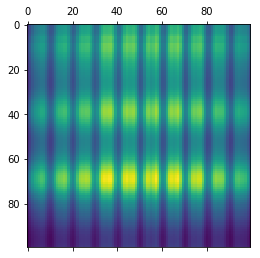

In [19]:
G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(maybed,CD))]) #equal to D
G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,maybeh))]) #equal to H

G_theta = G_theta.reshape(L,M)
G_etha = G_etha.reshape(N,L) 

m = np.matmul(G_etha,G_theta)

plt.matshow(m.T)

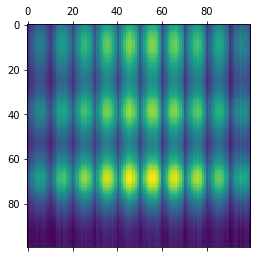

In [20]:
plt.matshow(data.T)

# Extract features of theta - does the peaks match with simulated data?

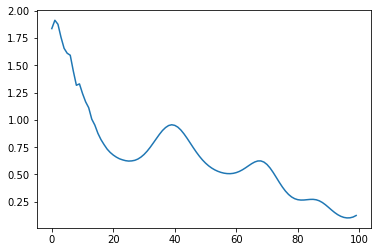

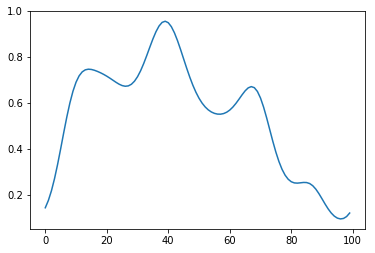

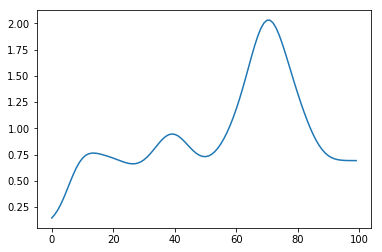

In [21]:
fig = 0
for i in G_theta: #features = peaks - 
    plt.figure(fig)
    plt.plot(i)
    fig = fig + 1
    plt.show

# Sampling

In [22]:
def leastSquare(theta,etha):
    sigma = 1
    
    #print(etha)
    #print(theta)
    #print(CD)
    #print(CH)
    
    
    
    G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(theta,CD))]) #equal to D
    G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,etha))]) #equal to H
    
    G_theta = G_theta.reshape(L,M)
    G_etha = G_etha.reshape(N,L) 
    
    
    temp = data - np.matmul(G_etha,G_theta)
    temp2 = np.sum(np.square(temp))
    temp3 = 0.5*((pow(sigma, -2))*(temp2) + np.matmul(theta.T,theta) + np.matmul(etha.T,etha))
    #print(temp3)
    return temp3

# Get MAP-estimates (this is only MAP-estimates for theta and etha!)

In [23]:
mapD = maybed #this is actaully theta
mapH = maybeh #this is actually etha

In [24]:
leastSquare(mapD,mapH)

173.73353184329423

# Look at distribution of theta

# Metropolis-hastings sampling

#### We draw from a proposal gaussian distribution with mean and standard deviation equal to what is observed from the MAP estimate of theta. Based on the new sample, we get a new state and we use least squares negative log-likelihood as acceptance criterion.   

In [26]:
samplesize = 2000
state = mapD
samples = []
cur_state=state #initialize state

for i in range(samplesize):
    
    #cur_state = state
    sample = cur_state + np.random.normal(np.mean(cur_state),np.std(cur_state),1) #draw sample from Gaussian proposal distribution 
    
    #sampleidx = np.random.randint(0,len(state))  #random walk 
    
    #state[sampleidx] = sample 
    
    
    #print(leastSquare(mapD,mapH))
    #print(leastSquare(sample,mapH))
    
    
    #lp_state_new = leastSquare(state_new,mapH) #calculate negative log likelihood for new state
    
    
    if leastSquare(sample,mapH)/leastSquare(cur_state,mapH) <= 1.5: #acceptance criterion   
        samples.append(sample)
        print(leastSquare(sample,mapH))
        print(leastSquare(mapD,mapH))
        cur_state = sample
    #else:
     #   state = state_prev #Reject sample and try again
        

    
    

175.38525503499562
173.73353184329423
201.59184298057315
173.73353184329423
174.56420240198563
173.73353184329423
261.134731743554
173.73353184329423
376.1180522931775
173.73353184329423
173.72601538506854
173.73353184329423
196.3616616049982
173.73353184329423
195.09125591060683
173.73353184329423
188.80527388010964
173.73353184329423
191.59855565156718
173.73353184329423
266.66239872461136
173.73353184329423
245.0006390458948
173.73353184329423
261.3797820649662
173.73353184329423
197.378453488797
173.73353184329423
174.28717999276458
173.73353184329423
181.0597329360047
173.73353184329423
211.4142962134315
173.73353184329423
177.58544025042312
173.73353184329423
251.3254606784528
173.73353184329423
193.50687266564185
173.73353184329423
209.13875908746022
173.73353184329423
177.59740602130273
173.73353184329423
196.79090448322336
173.73353184329423
275.9325260273414
173.73353184329423
389.94496989739116
173.73353184329423
276.70099581053785
173.73353184329423
177.84733124526565
173.7

In [27]:
samples = np.array(samples) #convert data type
samples.shape

(119, 300)

In [29]:
import seaborn as sns

C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

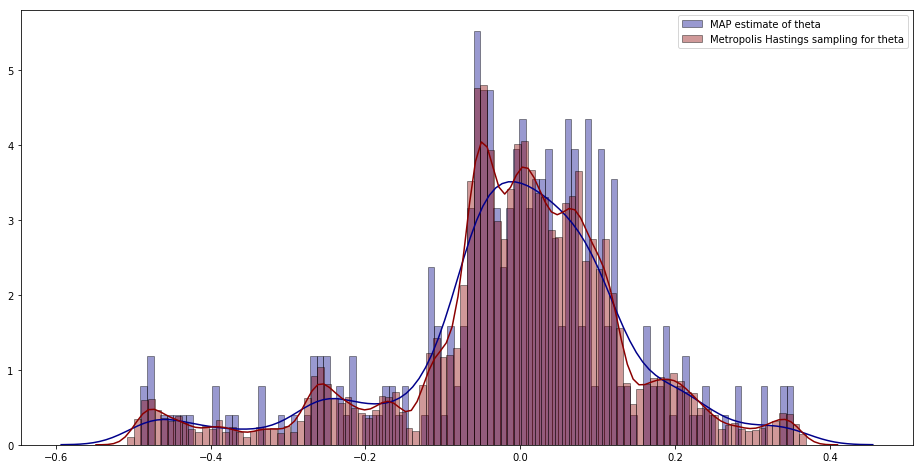

In [30]:
plt.figure(figsize=(16, 8))
true = sns.distplot(mapD, hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, label = 'MAP estimate of theta'
             )
pred = sns.distplot(samples.reshape(samples.shape[0]*samples.shape[1]), hist=True, kde=True,
             bins=100, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, label = 'Metropolis Hastings sampling for theta'
             )
plt.legend()
plt.show

# Now, we look at the distribution of D computed from MAP-estimate of theta  

In [31]:
import seaborn as sns

In [32]:
G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(mapD,CD))]) #equal to D
#G_theta = G_theta.reshape(L,M)

# D is calculated from the sampled values of theta

In [33]:
Dsamples = []
for i in range(samples.shape[0]):
    Dsampled = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(samples[i],CD))]) #equal to D
    Dsamples.append(Dsampled)

Dsamples = np.array(Dsamples).reshape(samples.shape[0]*samples.shape[1])
Dsamples.shape

(35700,)

C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

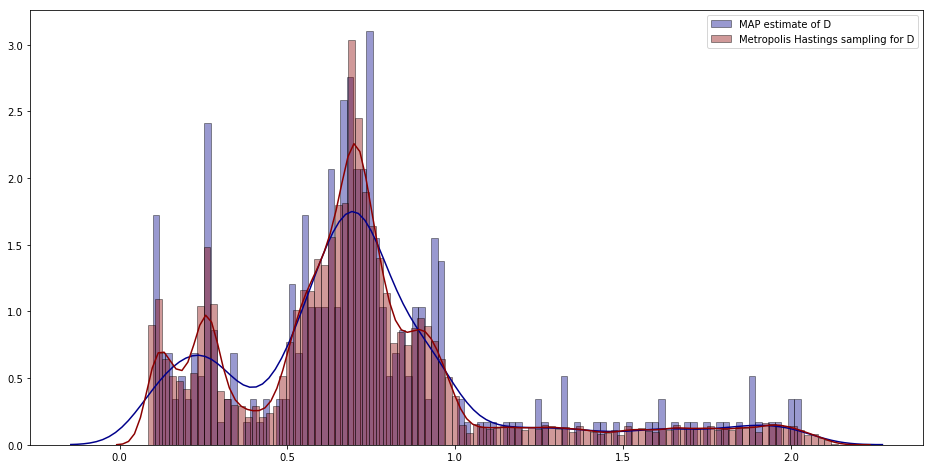

In [34]:
plt.figure(figsize=(16, 8))
true = sns.distplot(G_theta, hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'}, label = 'MAP estimate of D'
             )
pred = sns.distplot(Dsamples, hist=True, kde=True,
             bins=100, color = 'darkred', 
             hist_kws={'edgecolor':'black'}, label = 'Metropolis Hastings sampling for D'
             )
plt.legend()
plt.show

# Gradient Descent
#### This implementation was never finished...  

In [242]:
def leastSquare2(data,etha,theta):
#def leastSquare(etha,theta):
    #etha = params[0]
    #theta = params[1]
    sigma = 1
    
    G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(theta,CD))]) #equal to D
    G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,etha))]) #equal to H
    
    G_theta = G_theta.reshape(L,M)
    G_etha = G_etha.reshape(N,L) 
    
    
    temp = data - np.matmul(G_etha,G_theta)
    temp2 = np.sum(np.square(temp))
    temp3 = 0.5*((pow(sigma, -2))*(temp2) + np.matmul(theta.T,theta) + np.matmul(etha.T,etha))
    print(temp3)
    return temp3

In [243]:
def GradientLinkFunExponential(inputArg, sigma, lambdaa):
    #output = np.array([linkFunExponential(hi,1,1) for hi in theta_input])
    output = list()
    for element in inputArg:
        temp1 = lambdaa * (linkFunExponential(element,1,1))
        temp2 = (element**2)/float(2*(sigma**2))
        temp3 = (float(1)/float(sqrt(2*np.pi)*sigma) ) *(np.exp(temp1-temp2))
        output.append(temp3)
    return output

In [244]:
def gradLeastSquares_theta(data,etha,theta,noise):
    G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(theta,CD))]) #equal to D
    G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,etha))]) #equal to H

    G_theta = G_theta.reshape(L,M)
    G_etha = G_etha.reshape(N,L) 

    e1 = np.matmul(G_etha,G_theta) - data #NxM
    e2 = np.matmul(G_etha.T,e1) 
    e3 = e2.reshape(e2.shape[0]*e2.shape[1]) #vectorization

    in_ = np.matmul(CD.T,theta) #input to differentiated link function (exponential)

    e4 = np.multiply(e3,GradientLinkFunExponential(in_,1,1))
    e5 = np.matmul(e4,CD.T)
    

    return (sigma**(-2) * e5) + theta



    
    
    

In [245]:
def gradLeastSquares_etha(data,etha,theta,noise):
    G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(theta,CD))]) #equal to D
    G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,etha))]) #equal to H


    G_theta = G_theta.reshape(L,M)
    G_etha = G_etha.reshape(N,L) 

    e1 = np.matmul(G_etha,G_theta) - data #NxM
    e2 = np.matmul(e1,G_theta.T) 
    e3 = e2.reshape(e2.shape[0]*e2.shape[1]) #vectorization

    in_ = np.matmul(CH.T,etha) #input to differentiated link function (exponential)

    e4 = np.multiply(e3,GradientLinkFunExponential(in_,1,1))
    e5 = np.matmul(e4,CH.T)
    return (sigma**(-2) * e5) + etha



In [246]:
#gradLeastSquares_theta(data,etha,theta,sigma)

In [247]:
cur_etha = np.zeros(200)
cur_theta = np.zeros(200)


rate = 0.0001 # Learning rate
precision = 0.00001 #This tells us when to stop the algorithm
previous_step_size_etha = 1 #
previous_step_size_theta = 1
max_iters = 1000 # maximum number of iterations
iters = 0 #iteration counter

In [248]:
while previous_step_size_etha > precision and iters < max_iters:
    prev_etha = cur_etha #Store current x value in prev_x
    prev_theta = cur_theta
    
    cur_theta = cur_theta - rate * gradLeastSquares_theta(data,prev_etha,prev_theta,sigma)
    cur_etha = cur_etha - rate * gradLeastSquares_etha(data,prev_etha,prev_theta,sigma) #Grad descent
    
    
    
    previous_step_size_etha = np.sum(np.abs(cur_etha - prev_etha)) #Change in x
    previous_step_size_theta = np.sum(np.abs(cur_theta - prev_theta))
                                
                                
    print(leastSquare2(data,cur_etha,cur_theta))  
    iters = iters+1 #iteration count
    #print("Iteration",iters) #Print iterations
    


ValueError: shapes (200,) and (900,900) not aligned: 200 (dim 0) != 900 (dim 0)

In [ ]:
cur_theta.shape

In [ ]:
cur_etha

In [ ]:
a = np.asarray([1,2,3])
b = np.asarray([2,8,6])

In [ ]:
a*b

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.matshow(data.T)
#H(1,:)

In [ ]:
G_theta = np.array([linkFunExponential(hi,1,1) for hi in (np.matmul(cur_theta,CD))]) #equal to D
G_etha = np.array([linkFunExponential(di,1,1) for di in (np.matmul(CH,cur_etha))]) #equal to H

G_theta = G_theta.reshape(L,M)
G_etha = G_etha.reshape(N,L) 

m = np.matmul(G_etha,G_theta)

plt.matshow(m.T)

In [ ]:
plt.matshow(G_etha)

In [132]:
mat = scipy.io.loadmat('Hgenerated.mat')

In [142]:
h = np.asarray(mat['H'])

In [143]:
mat2 = scipy.io.loadmat('Dgenerated.mat')

In [148]:
d = np.asarray(mat2['D'])

In [149]:
h.shape

(2, 100)

In [150]:
d.shape

(2, 100)

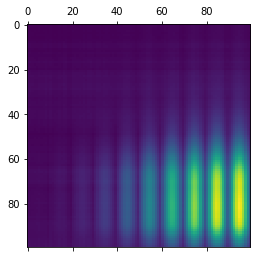

In [185]:
plt.matshow(data.T)

In [156]:
res = np.matmul(d.T,h)

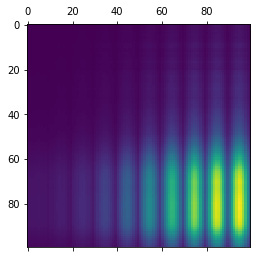

In [158]:
plt.matshow(res.T)

In [163]:
from matplotlib.pyplot import plot

In [175]:
d[0].T

array([0.27491234, 0.27035642, 0.27036789, 0.27506407, 0.27742604,
       0.29067869, 0.27596902, 0.27277614, 0.2761855 , 0.24093702,
       0.29962117, 0.29873538, 0.33199103, 0.3588068 , 0.38934365,
       0.37137685, 0.38487301, 0.35145886, 0.2880109 , 0.25981956,
       0.37709852, 0.43917257, 0.50172493, 0.56470141, 0.58143958,
       0.59196656, 0.53343999, 0.4961864 , 0.43070399, 0.35225101,
       0.50261299, 0.65079793, 0.7812192 , 0.87285858, 0.94491925,
       0.92414247, 0.83470207, 0.70625512, 0.57565666, 0.45080979,
       0.71352609, 0.94338755, 1.17900176, 1.39674103, 1.4939346 ,
       1.45971487, 1.28986993, 1.06178438, 0.80409522, 0.61644173,
       0.9951148 , 1.3733092 , 1.75768889, 2.08947089, 2.24225597,
       2.17107783, 1.91994085, 1.56368047, 1.18188126, 0.84822826,
       1.31372502, 1.85761362, 2.37245782, 2.81952239, 3.04245852,
       2.99654663, 2.66102655, 2.19553666, 1.58769546, 1.09109912,
       1.6279166 , 2.30264681, 3.01220986, 3.58538359, 3.85994

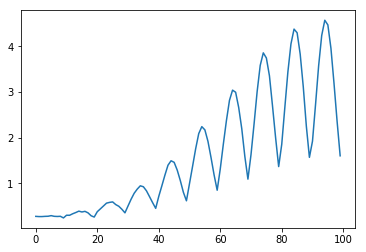

In [176]:
plot(d[0].T)

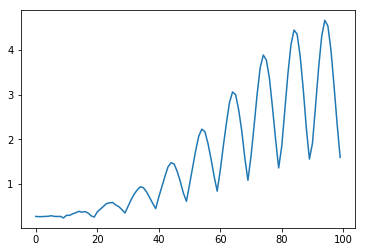

In [177]:
plot(d[1].T)

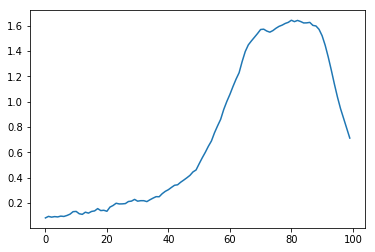

In [179]:
plot(h[0].T)

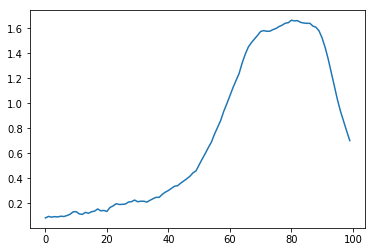

In [180]:
plot(h[1].T)

In [183]:
h[0]

array([0.08341434, 0.09548147, 0.08950618, 0.09375786, 0.09120625,
       0.09760831, 0.09494956, 0.10257217, 0.11304282, 0.1326844 ,
       0.13462584, 0.11627758, 0.11155678, 0.1285727 , 0.12121206,
       0.13432617, 0.13870468, 0.1568112 , 0.14124874, 0.14363147,
       0.13571948, 0.16873684, 0.18123244, 0.19904654, 0.19353817,
       0.19411686, 0.19640412, 0.21273061, 0.21589304, 0.22949366,
       0.21537652, 0.21933755, 0.21912853, 0.21207837, 0.22647709,
       0.23935258, 0.25097842, 0.25028776, 0.27468467, 0.29301187,
       0.30601408, 0.32392166, 0.34069682, 0.34466924, 0.36497822,
       0.38178105, 0.39959458, 0.41850167, 0.44602196, 0.46141921,
       0.5098361 , 0.55665184, 0.60026746, 0.64808421, 0.69006737,
       0.75467991, 0.80923709, 0.86071662, 0.93815469, 1.00107472,
       1.05672022, 1.11878456, 1.17686558, 1.22803797, 1.31695362,
       1.39507692, 1.44752575, 1.47869281, 1.50772917, 1.53711107,
       1.56872541, 1.57121385, 1.55658657, 1.54778641, 1.56024

In [184]:
h[1]

array([0.08304197, 0.0950243 , 0.08919306, 0.09329331, 0.0908525 ,
       0.09665212, 0.09428939, 0.10184437, 0.11204137, 0.1314696 ,
       0.13288805, 0.1153376 , 0.11115589, 0.12755864, 0.12011284,
       0.13244689, 0.13770584, 0.15453281, 0.13990871, 0.14246327,
       0.13468281, 0.16652246, 0.17880922, 0.19634087, 0.19078555,
       0.19140334, 0.19382963, 0.20953934, 0.21293854, 0.22588022,
       0.21252122, 0.2165168 , 0.21646089, 0.20959898, 0.22372022,
       0.23665665, 0.24786829, 0.24744781, 0.27118988, 0.28914115,
       0.30202259, 0.31965374, 0.33634632, 0.34082754, 0.36109083,
       0.37840065, 0.39648401, 0.4161389 , 0.44323291, 0.46013148,
       0.50785126, 0.55401767, 0.59861028, 0.64599942, 0.68937073,
       0.75265947, 0.80722505, 0.86182241, 0.93516308, 0.99542026,
       1.05946955, 1.12419284, 1.18166043, 1.23805852, 1.32257323,
       1.3919131 , 1.44946341, 1.48453171, 1.51381842, 1.5424654 ,
       1.57389961, 1.5806384 , 1.57554402, 1.5761104 , 1.58853